# Réalisez des modélisations de données performantes

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import plotly.express as px

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from pandas.api.types import is_string_dtype

from IPython.core.display import HTML

## Régression linéaire simple

In [21]:
data_ozone = pd.read_csv('data/dataset_ozone.txt', sep=";")
data_ozone.head()

obs  maxO3    T9   T12   T15  Ne9  Ne12  Ne15      Vx9     Vx12     Vx15  \
0  601     87  15,6  18,5  18,4    4     4     8   0,6946  -1,7101  -0,6946   
1  602     82    17  18,4  17,7    5     5     7  -4,3301       -4       -3   
2  603     92  15,3  17,6  19,5    2     5     4   2,9544   1,8794   0,5209   
3  604    114  16,2  19,7  22,5    1     1     0   0,9848   0,3473  -0,1736   
4  605     94  17,4  20,5  20,4    8     8     7     -0,5  -2,9544  -4,3301   

   maxO3v   vent pluie  
0      84   Nord   Sec  
1      87   Nord   Sec  
2      82    Est   Sec  
3      92   Nord   Sec  
4     114  Ouest   Sec

<AxesSubplot:xlabel='T12', ylabel='maxO3'>

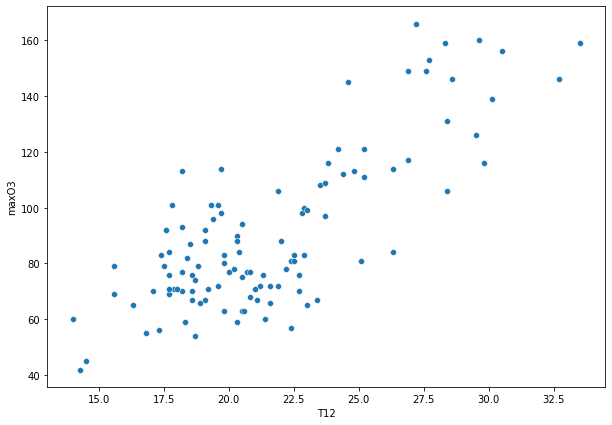

In [31]:
# On convertit les colonnes intéressantes en numérique
data_ozone['maxO3'] = pd.to_numeric(data_ozone['maxO3'])
if is_string_dtype(data_ozone['T12']):
    data_ozone['T12'] = pd.to_numeric(data_ozone['T12'].str.replace(',', '.'))
    
plt.figure(figsize=(10,7))
sns.scatterplot(x=data_ozone['T12'], y=data_ozone['maxO3'])

In [75]:
# Préparation des données pour sklearn
X = data_ozone['T12'].values.reshape(-1, 1)
y = data_ozone['maxO3'].values.reshape(-1, 1)

# Création et entrainement du modèle de régression linéaire
regr = linear_model.LinearRegression()
regr.fit(X, y)

# On calcule les y calculés par le modèle
y_pred = regr.predict(X)

print("Coefficient de la droite = " + str(regr.coef_))
print("Ordonnées à l'origine de la droite = " + str(regr.intercept_))
print("Erreur des MCO = " + str(mean_squared_error(y, y_pred)))
print("Score R² = " + str(r2_score(y, y_pred)))

Coefficient de la droite = [[5.46868487]]
Ordonnées à l'origine de la droite = [-27.41963585]
Erreur des MCO = 303.10582111261584
Score R² = 0.6150674018851134


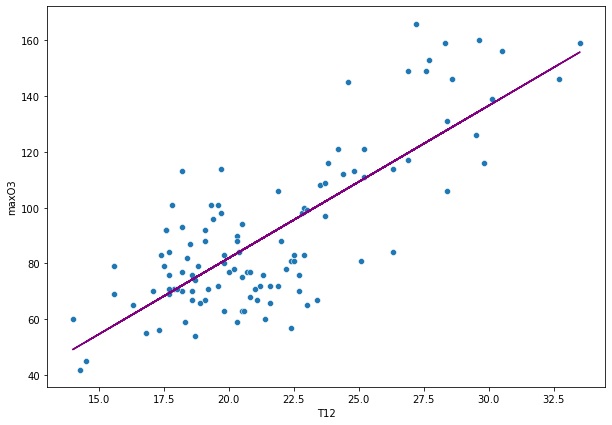

In [51]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=data_ozone['T12'], y=data_ozone['maxO3'])
plt.plot(X, y_pred, color="purple")

In [60]:
# Prédiction de la concentration en Ozone pour une journée où la température à midi est de 19°C
ozone_pred = regr.predict(np.array([19]).reshape(-1,1))
print("Prédiction du taux d'ozone : " + str(ozone_pred[0][0]))

Prédiction du taux d'ozone : 76.48537662966224


<AxesSubplot:ylabel='Count'>

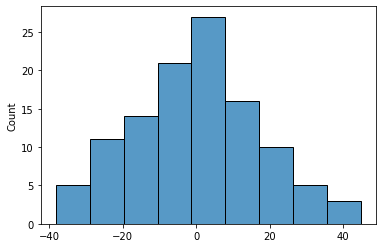

In [96]:
# Histogramme des résidus
residus = y.reshape(1,-1)[0] - y_pred.reshape(1,-1)[0]
sns.histplot(residus)

In [50]:
df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()